## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras
from keras.regularizers import l1, l2, l1_l2

# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], regularizer='l1', rgl_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    if regularizer == 'l1':
        for i, n_units in enumerate(num_neurons):
            if i == 0:
                x = keras.layers.Dense(units=n_units, 
                                       activation="relu", 
                                       name="hidden_layer"+str(i+1), 
                                       kernel_regularizer=l1(rgl_ratio))(input_layer)
            else:
                x = keras.layers.Dense(units=n_units, 
                                       activation="relu", 
                                       name="hidden_layer"+str(i+1),
                                       kernel_regularizer=l1(rgl_ratio))(x)

        out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)

        model = keras.models.Model(inputs=[input_layer], outputs=[out])

    elif regularizer == 'l2':
        for i, n_units in enumerate(num_neurons):
            if i == 0:
                x = keras.layers.Dense(units=n_units, 
                                       activation="relu", 
                                       name="hidden_layer"+str(i+1), 
                                       kernel_regularizer=l2(rgl_ratio))(input_layer)
            else:
                x = keras.layers.Dense(units=n_units, 
                                       activation="relu", 
                                       name="hidden_layer"+str(i+1),
                                       kernel_regularizer=l2(rgl_ratio))(x)

        out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)

        model = keras.models.Model(inputs=[input_layer], outputs=[out])
        
    elif regularizer == 'l1_l2':
        for i, n_units in enumerate(num_neurons):
            if i == 0:
                x = keras.layers.Dense(units=n_units, 
                                       activation="relu", 
                                       name="hidden_layer"+str(i+1), 
                                       kernel_regularizer=l1_l2(rgl_ratio))(input_layer)
            else:
                x = keras.layers.Dense(units=n_units, 
                                       activation="relu", 
                                       name="hidden_layer"+str(i+1),
                                       kernel_regularizer=l1_l2(rgl_ratio))(x)

        out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)

        model = keras.models.Model(inputs=[input_layer], outputs=[out])

        
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
REG = ['l1', 'l2', 'l1_l2']
L_EXP = [1e-2, 1e-4, 1e-8]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for reg in REG:
    for ratio in L_EXP:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print('Experiment with {} Regulizer = {}'.format(reg, ratio))
        model = build_mlp(input_shape=x_train.shape[1:], regularizer=reg, rgl_ratio=ratio)
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
        
        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)
        
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = 'exp-{}-{}'.format(reg, ratio)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with l1 Regulizer = 0.01
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for updatin

50000/50000 [==============================] - 4s 75us/step - loss: 2.4626 - acc: 0.0977 - val_loss: 2.4628 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 3s 70us/step - loss: 2.4626 - acc: 0.0975 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 4s 73us/step - loss: 2.4626 - acc: 0.0972 - val_loss: 2.4626 - val_acc: 0.1000s: 2.4626 -
Experiment with l1 Regulizer = 0.0001
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)

50000/50000 [==============================] - 3s 58us/step - loss: 2.6769 - acc: 0.6270 - val_loss: 2.9535 - val_acc: 0.5243
Epoch 50/50
50000/50000 [==============================] - 3s 58us/step - loss: 2.6387 - acc: 0.6296 - val_loss: 2.8854 - val_acc: 0.5362
Experiment with l1 Regulizer = 1e-08
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)

50000/50000 [==============================] - 3s 58us/step - loss: 0.8702 - acc: 0.6968 - val_loss: 1.4019 - val_acc: 0.5272
Experiment with l2 Regulizer = 0.01
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
____________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 69us/step - loss: 2.1614 - acc: 0.2818 - val_loss: 2.0107 - val_acc: 0.3319
Epoch 2/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.9489 - acc: 0.3688 - val_loss: 1.8985 - val_acc: 0.3877
Epoch 3/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.8654 - acc: 0.3989 - val_loss: 1.8330 - val_acc: 0.4092
Epoch 4/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.8060 - acc: 0.4183 - val_loss: 1.7836 - val_acc: 0.4269
Epoch 5/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.7577 - acc: 0.4344 - val_loss: 1.7466 - val_acc: 0.4302
Epoch 6/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.7175 - acc: 0.4488 - val_loss: 1.7217 - val_acc: 0.4423
Epoch 7/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.6841 - acc: 0.4588 - val_loss: 1.6926 - val_acc

50000/50000 [==============================] - 3s 58us/step - loss: 1.7991 - acc: 0.3694 - val_loss: 1.7424 - val_acc: 0.3938
Epoch 3/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.7079 - acc: 0.4015 - val_loss: 1.6751 - val_acc: 0.4182
Epoch 4/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.6475 - acc: 0.4241 - val_loss: 1.6343 - val_acc: 0.4277
Epoch 5/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.6000 - acc: 0.4398 - val_loss: 1.5996 - val_acc: 0.4312
Epoch 6/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.5607 - acc: 0.4530 - val_loss: 1.5581 - val_acc: 0.4495
Epoch 7/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.5275 - acc: 0.4631 - val_loss: 1.5273 - val_acc: 0.4593
Epoch 8/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.4970 - acc: 0.4739 - val_loss: 1.5134 - val_acc: 0.4567
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 3s 60us/step - loss: 3.1973 - acc: 0.0976 - val_loss: 2.4707 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 3s 61us/step - loss: 2.4631 - acc: 0.0978 - val_loss: 2.4623 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 3s 61us/step - loss: 2.4624 - acc: 0.0981 - val_loss: 2.4623 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 3s 61us/step - loss: 2.4624 - acc: 0.0962 - val_loss: 2.4623 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.4623 - acc: 0.0990 - val_loss: 2.4622 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 3s 61us/step - loss: 2.4623 - acc: 0.0984 - val_loss: 2.4621 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 3s 61us/step - loss: 2.4623 - acc: 0.0979 - val_loss: 2.4622 - val_acc: 0.1000
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 3s 67us/step - loss: 12.0911 - acc: 0.3962 - val_loss: 11.2559 - val_acc: 0.4054
Epoch 5/50
50000/50000 [==============================] - 4s 72us/step - loss: 10.5228 - acc: 0.4056 - val_loss: 9.8180 - val_acc: 0.4128
Epoch 6/50
50000/50000 [==============================] - 3s 67us/step - loss: 9.1859 - acc: 0.4132 - val_loss: 8.5797 - val_acc: 0.4194
Epoch 7/50
50000/50000 [==============================] - 3s 67us/step - loss: 8.0489 - acc: 0.4197 - val_loss: 7.5348 - val_acc: 0.4170
Epoch 8/50
50000/50000 [==============================] - 3s 62us/step - loss: 7.0808 - acc: 0.4251 - val_loss: 6.6499 - val_acc: 0.4171
Epoch 9/50
50000/50000 [==============================] - 3s 62us/step - loss: 6.2547 - acc: 0.4286 - val_loss: 5.8894 - val_acc: 0.4259
Epoch 10/50
50000/50000 [==============================] - 3s 61us/step - loss: 5.5525 - acc: 0.4324 - val_loss: 5.2374 - val_acc: 0.4270
Epoch 11/50
50000/50000 [=======================

50000/50000 [==============================] - 3s 59us/step - loss: 8.7252 - acc: 0.4081 - val_loss: 8.1881 - val_acc: 0.4075
Epoch 6/50
50000/50000 [==============================] - 3s 60us/step - loss: 7.7044 - acc: 0.4148 - val_loss: 7.2581 - val_acc: 0.4106
Epoch 7/50
50000/50000 [==============================] - 3s 60us/step - loss: 6.8340 - acc: 0.4223 - val_loss: 6.4470 - val_acc: 0.4197
Epoch 8/50
50000/50000 [==============================] - 3s 59us/step - loss: 6.0915 - acc: 0.4270 - val_loss: 5.7632 - val_acc: 0.4314
Epoch 9/50
50000/50000 [==============================] - 3s 63us/step - loss: 5.4566 - acc: 0.4312 - val_loss: 5.1769 - val_acc: 0.4277
Epoch 10/50
50000/50000 [==============================] - 3s 64us/step - loss: 4.9158 - acc: 0.4378 - val_loss: 4.6693 - val_acc: 0.4390
Epoch 11/50
50000/50000 [==============================] - 3s 66us/step - loss: 4.4508 - acc: 0.4418 - val_loss: 4.2448 - val_acc: 0.4409
Epoch 12/50
50000/50000 [=========================

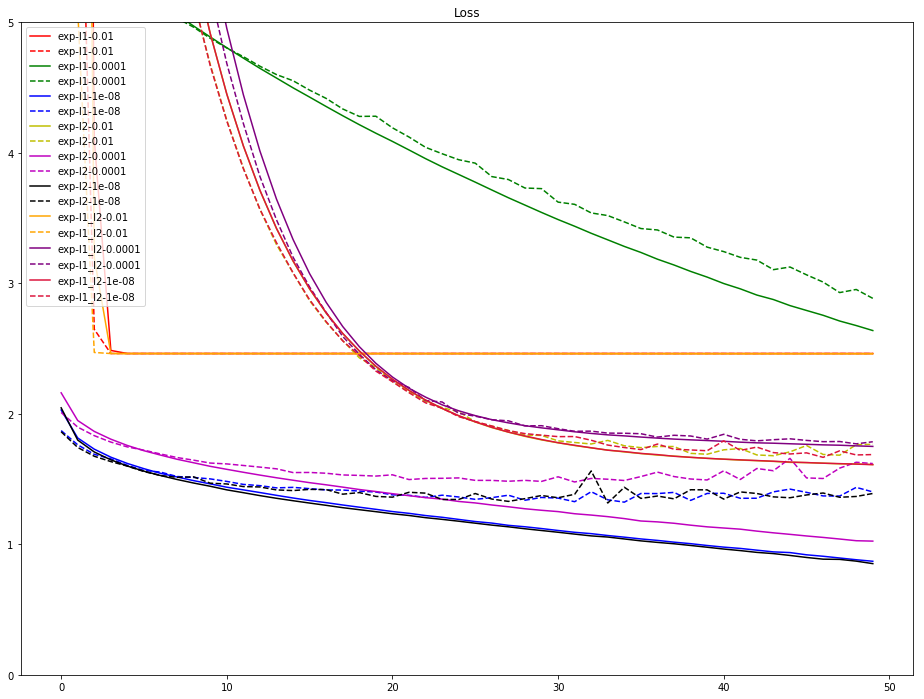

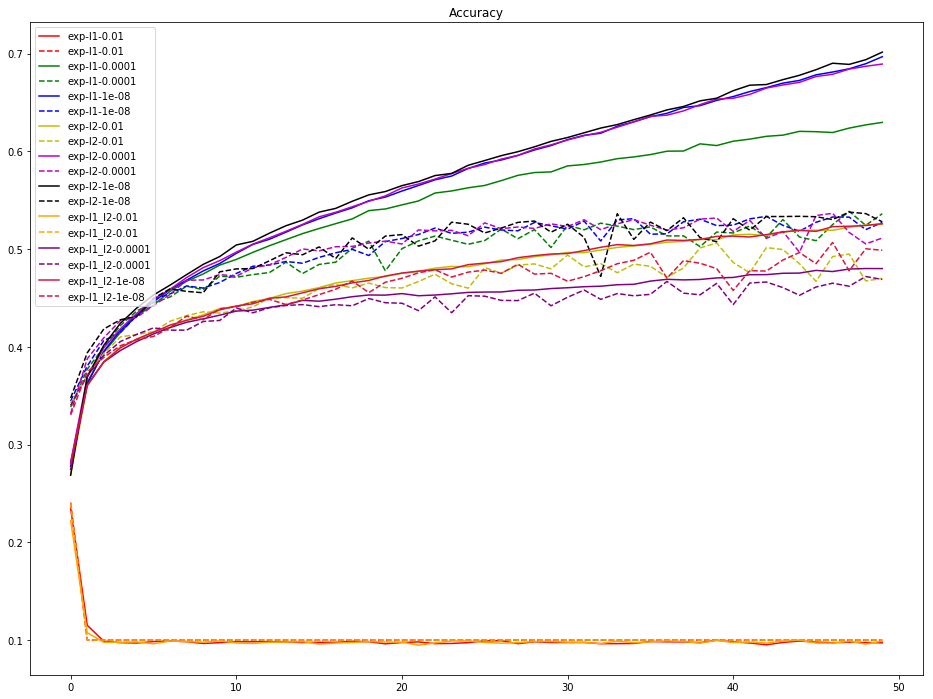

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k", "orange", "purple", "crimson"]

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()